<h1>Logistic Regression on kddcup dataset using 10% data</h1>

<h2>Preprocessing the data</h2>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Since the dataset has no header so we add header because we do data manipulations using column names
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate, 
target"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()):
        columns.append(c.strip()) 
print(len(columns)) 

42


In [3]:
#Making a dictionary with target, attack_type as key,value pairs to split in prove vs not probe class
attacks_types = { 
'normal': 1, 
'back': 0, 
'buffer_overflow': 1, 
'ftp_write': 1, 
'guess_passwd': 1, 
'imap': 1, 
'ipsweep': 1, 
'land': 0, 
'loadmodule': 1, 
'multihop': 1, 
'neptune': 0, 
'nmap': 1, 
'perl': 1, 
'phf': 1, 
'pod': 0, 
'portsweep': 1, 
'rootkit': 1, 
'satan': 1, 
'smurf': 0, 
'spy': 1, 
'teardrop': 0, 
'warezclient': 1, 
'warezmaster': 1, 
} 

In [4]:
#Reading the csv and making a dataframe from the data
kdd = pd.read_csv(r"C:\Users\myste\Documents\MSCS\Fall 2020\ML\kddcup.data_10_percent.gz", names = columns) 
#Using the above dictionary to add Attack Type as another value for classification and priting a few values
kdd['attack_type'] = kdd.target.apply(lambda x:attacks_types[x[:-1]]) 
kdd.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


<h2>Classifying the data as probe vs not probe attack type</h2>

In [5]:
#printing the size of the probe vs not probe values
print(len(kdd[kdd['attack_type'] == 1]))
print(len(kdd[kdd['attack_type'] == 0]))

102563
391458


In [6]:
kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,1
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,1
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,1
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,1


In [7]:
#label encoding
kdd["protocol_type"] = kdd["protocol_type"].astype('category')
kdd["protocol_type"] = kdd["protocol_type"].cat.codes
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,1,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [8]:
#label encoding
kdd["service"] = kdd["service"].astype('category')
kdd["service"] = kdd["service"].cat.codes
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,1,22,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,22,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,22,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,22,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,22,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [9]:
#label encoding
kdd["flag"] = kdd["flag"].astype('category')
kdd["flag"] = kdd["flag"].cat.codes
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [10]:
kdd = kdd.drop(['target', ], axis = 1)
kdd.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [11]:
kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,1
494017,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,1
494018,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,1
494019,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,1


In [12]:
#Putting attack_type as the target output and all the other columns as features for training in X
y_init = kdd[['attack_type']] 
X_init = kdd.drop(['attack_type', ], axis = 1)
print(y_init.shape, X_init.shape)

(494021, 1) (494021, 41)


In [13]:
#Undersampling the data because it is unbalanced
print('Original dataset shape %s' % Counter(y_init))
y_init=y_init.astype('int')
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(X_init, y_init)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({'attack_type': 1})
Resampled dataset shape Counter({'attack_type': 1})


In [14]:
#Scaling the X values for the the data so that it can be passed for training the model
scaled = MinMaxScaler() 
X = scaled.fit_transform(X) 

<h2>Splitting the data into testing and training (20:80 ratio)</h2>

In [15]:
#Splitting the data into testing and training using a randomly generated random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random)
y_test=y_test.astype('int')
y_train=y_train.astype('int')
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(164100, 41) (164100, 1)
(41026, 41) (41026, 1)


<h2>Running the logistic model and finding the accuracies over different iterarions</h2>

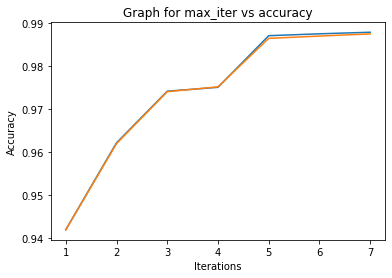

In [16]:
#Plotting the graphs to for testing and training accuracies of for different iterations 
testaccuracy=[]
trainaccuracy = []
iterations=list(range(1,8))
for i in iterations:
    LR=LogisticRegression(max_iter=i)
    LR.fit(X_train,y_train)
    Test_Predictions=np.array(LR.predict(X_test))
    Train_Predictions=np.array(LR.predict(X_train))
    testaccuracy.append(LR.score(X_test,y_test))
    trainaccuracy.append(LR.score(X_train,y_train))
plt.plot(iterations,testaccuracy)
plt.plot(iterations,trainaccuracy)
plt.title("Graph for max_iter vs accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")
plt.show()

<h3> The final training and testing accuracies are both 0.99 .As we can see above the training and testing accuracies become the same. According to the accuracy values the model does not seem to be overfitting as the accuracies for testing and training data are nearly identical, in case the model was overfitting the training accuracy would have remained high but the testing accuracy would be much lower in comparision.</h3>

Testing accuracy: 0.9879101057865743
Training accuracy: 0.9874710542352224
Weights :  [[ 3.45117360e-02  1.43260161e+00  1.23345956e-01  4.84557706e-01
   8.10532947e-04  2.62341873e-03 -2.18029630e-03 -1.93114161e-01
   5.22482812e-05 -1.53731224e-02  1.57815677e-03  1.21567050e+00
  -4.01054090e-04  1.52254922e-03  4.23536786e-04  1.76991722e-04
   6.06969388e-04  1.04582718e-03  1.66498971e-03  0.00000000e+00
   0.00000000e+00  2.30755836e-02 -1.91551960e+00 -1.92390640e+00
  -6.83786031e-01 -6.50247746e-01 -1.15975123e-02 -6.17716340e-02
   1.18658491e+00  7.86182380e-01  3.68467556e-01 -1.05552504e+00
   1.47338918e-01  3.53771570e-01  1.09155743e+00 -7.71204633e-01
   1.83361167e-01 -6.83217702e-01 -6.54132509e-01 -9.25638318e-02
  -7.73947869e-02]]


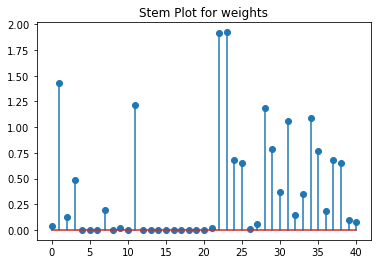

In [17]:
#Calculating and plotting weights for logistic regression model
lgr = LogisticRegression(C=0.001, penalty ='l2',solver='liblinear')
lgr.fit(X_train, y_train)
print("Testing accuracy:", metrics.accuracy_score(lgr.predict(X_test), y_test))
print("Training accuracy:", metrics.accuracy_score(lgr.predict(X_train), y_train))
weights=abs(lgr.coef_.flatten())
print("Weights : ",lgr.coef_)
plt.stem(weights)
plt.title("Stem Plot for weights")
plt.show()

<h2>Performing Logistic Regression for L1 and L2 regularization</h2>

Accuracy: 0.9867888655974261
Precision: 0.984302862419206
Recall: 0.9893029844185024
L1 Weights :  [[ 0.00000000e+00  2.91195154e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  9.90978986e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.37134077e+00 -5.10976865e+00
  -7.53394350e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.88978279e+00  1.98848026e-03  0.00000000e+00 -4.24156047e-01
   0.00000000e+00  0.00000000e+00  6.56456137e-01  0.00000000e+00
   0.00000000e+00 -1.35417746e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


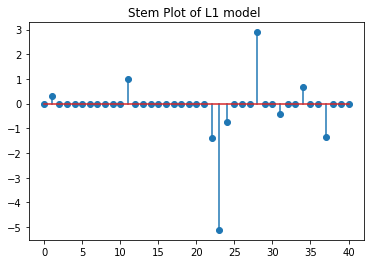

In [18]:
#Logistic Regression for L1 regularization
l1=LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
l1.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(l1.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l1.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l1.predict(X_test), y_test))
print("L1 Weights : ",l1.coef_)
weights1=l1.coef_.flatten()
plt.stem(weights1)
plt.title("Stem Plot of L1 model ")
plt.show()

Accuracy: 0.9961244089114221
Precision: 0.9992710307625018
Recall: 0.9930454940596929
L2 Weights :  [[ 5.33494492e-01  7.55523930e+00  2.26112993e+00 -7.58066663e-01
   8.10846161e-01 -2.69745373e-02 -2.24861413e+00 -1.47105482e+01
   1.04888072e-03 -1.56766189e+01  1.31025500e+00 -1.59660861e+00
  -4.27945341e-01  9.91662801e-01  1.51746874e-01  5.17598400e-02
   7.15777482e-01  3.36188277e-01  7.96405354e-01  0.00000000e+00
   0.00000000e+00  1.30676630e+01 -5.04203516e+00 -6.22382299e+00
   5.39342342e-01 -3.80927432e+00  4.66018357e+00 -6.21470382e+00
   6.58670641e+00  8.06863421e+00  5.69245991e-01 -4.29561200e+00
   4.73772443e+00 -4.69582606e+00  6.43368239e+00  1.16137089e+00
   2.70696128e+00 -4.09037097e+00 -1.93922457e+00 -3.34595173e+00
   2.83027013e-01]]


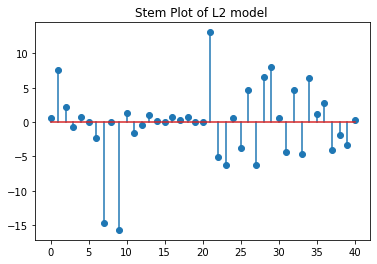

In [19]:
#Logistic Regression for L2 regularization
l2=LogisticRegression(penalty='l2')
l2.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(l2.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l2.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l2.predict(X_test), y_test))
print("L2 Weights : ",l2.coef_)
weights2=l2.coef_.flatten()
plt.stem(weights2)
plt.title("Stem Plot of L2 model ")
plt.show()

<h3> The accuracies for L1 is 0.98 and for L2 is 0.99. The weights for both the resularizations are very different. This is because both use a different vector norm to calculate regularization. While L1 uses Manhattan vector norm, L2 uses Eucledian.</h3>

<h2>L2 with different regularization strengths</h2>

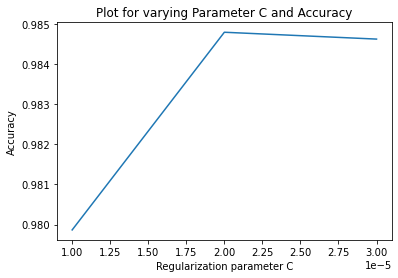

In [20]:
C=[0.00001,0.00002, 0.00003]
accuracy_c=[]
for i in C:
    LR2=LogisticRegression(C=i, penalty='l2', solver='liblinear')
    LR2.fit(X_train,y_train)
    Test_Predictions=np.array(LR2.predict(X_test))
    accuracy_c.append(LR2.score(X_test,y_test))
#plot for varying parameter C and accuracy
plt.plot(C,accuracy_c)
plt.title("Plot for varying Parameter C and Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Regularization parameter C")
plt.show()

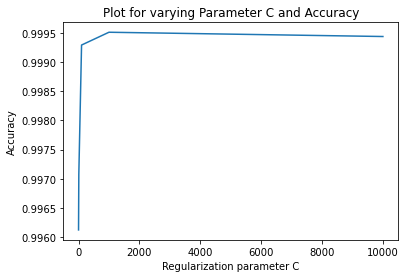

In [21]:
C=[1, 10,100,1000,10000]
accuracy_c=[]
for i in C:
    LR2=LogisticRegression(C=i, penalty='l2', solver='liblinear')
    LR2.fit(X_train,y_train)
    Test_Predictions=np.array(LR2.predict(X_test))
    accuracy_c.append(LR2.score(X_test,y_test))
#plot for varying parameter C and accuracy
plt.plot(C,accuracy_c)
plt.title("Plot for varying Parameter C and Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Regularization parameter C")
plt.show()